In [1]:
#loading images into a numpy array
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import numpy as np
import glob

In [2]:
X_data = []
files = glob.glob("Final_Combine/*.jpg")
for myfile in files:
    image = Image.open(myfile)
    data = asarray(image)
    X_data.append(data)
X_img = np.array(X_data)

X_data size : (1229, 576, 768, 3)


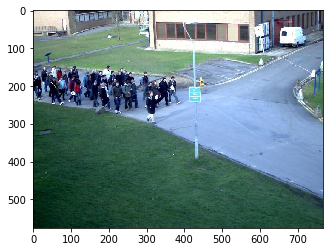

In [3]:
plt.imshow(X_img[1])
print("X_data size : " + str(X_img.shape))

In [4]:
#importing ground truth values
import pandas as pd
df=pd.read_csv('gt.csv', sep=',',header=None)
df.values

array([[ 7],
       [ 8],
       [ 8],
       ...,
       [39],
       [39],
       [39]])

In [5]:
y_data = np.array(df)
print(y_data)

[[ 7]
 [ 8]
 [ 8]
 ...
 [39]
 [39]
 [39]]


(800, 576, 768, 3)
(800, 1)


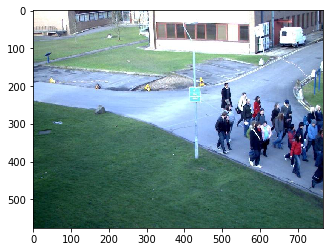

In [6]:
#splitting data for training and testing
train_set_X = X_img[:800]
test_set_X = X_img[800:]

train_set_y = y_data[:800]
test_set_y = y_data[800:]

plt.imshow(train_set_X[500])
print(train_set_X.shape)
print(train_set_y.shape)

In [23]:
train_num = train_set_X.shape[0]
total_pixels = train_set_X.shape[1] * train_set_X.shape[2] * train_set_X.shape[3];
print("number of training examples = " + str(train_num))
print("resolution of images = " + str(train_set_X.shape[1]) + " * " + str(train_set_X.shape[2]) + " * " + str(train_set_X.shape[3]))
print("Total pixels = " + str(total_pixels))
train_set_X_flatten = train_set_X.reshape(train_num, total_pixels)
#train_set_X_flatten = train_set_X_flatten.T
print(train_set_X_flatten.shape)

number of training examples = 800
resolution of images = 576 * 768 * 3
Total pixels = 1327104
(800, 1327104)


In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11292704982455249854
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6486088897562825980
physical_device_desc: "device: XLA_CPU device"
]


In [9]:
'''model = keras.layers.dense([train_set_X_flatten[0], activation = tf.nn.relu, input_shape = (train_set_X_flatten[0],),
                           keras.layers.dense(1)
                           ])
optimizer = tf.keras.optimizers.RMSprop(0.001)'''

'model = keras.layers.dense([train_set_X_flatten[0], activation = tf.nn.relu, input_shape = (train_set_X_flatten[0],),\n                           keras.layers.dense(1)\n                           ])\noptimizer = tf.keras.optimizers.RMSprop(0.001)'

In [10]:
'''model.compile(loss = 'mean_squared_error',
             optimizer = optimizer,
             metrics = ['mean_absolute_error', 'mean_squared_error'])
model.fit(train_set_X_flatten)'''

"model.compile(loss = 'mean_squared_error',\n             optimizer = optimizer,\n             metrics = ['mean_absolute_error', 'mean_squared_error'])\nmodel.fit(train_set_X_flatten)"

In [24]:
model = Sequential()

model.add(Dense(64, input_shape=(train_set_X_flatten.shape[1], ), activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(15, activation='relu'))
#model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [25]:
#adagrad = keras.optimizers.Adagrad(learning_rate=0.1)
#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])

In [ ]:
history = model.fit(train_set_X_flatten, train_set_y, epochs=10, batch_size =128)

Epoch 1/10
